In [12]:
print("hello")

hello


In [13]:
import sys
print(sys.executable)

/home/jacob/comphy/Comphy/myenv/bin/python


In [14]:

import torch
import numpy as np

In [15]:
import sys
print(sys.executable)

/home/jacob/comphy/Comphy/myenv/bin/python


In [16]:
x = torch.rand(5,3)
print(x)

tensor([[0.5420, 0.7726, 0.6290],
        [0.2157, 0.4182, 0.2943],
        [0.6040, 0.3082, 0.8387],
        [0.8639, 0.2142, 0.9282],
        [0.0760, 0.2845, 0.2362]])


In [17]:
torch.cuda.is_available()

False

In [18]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

NameError: name 'x_data' is not defined

In [9]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6148, 0.9531, 0.4761],
        [0.0620, 0.2841, 0.0409]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [10]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [11]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [12]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [13]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [17]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [18]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [19]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [20]:
n = np.ones(5)
t = torch.from_numpy(n)

In [35]:
np.add(n,1,out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([13., 13., 13., 13., 13.], dtype=torch.float64)
n: [13. 13. 13. 13. 13.]


In [20]:
def poly(x):
    a = 1
    b = 2
    c = 3
    d = 4
    y = a*x**3+b*x**2+c*x+d
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

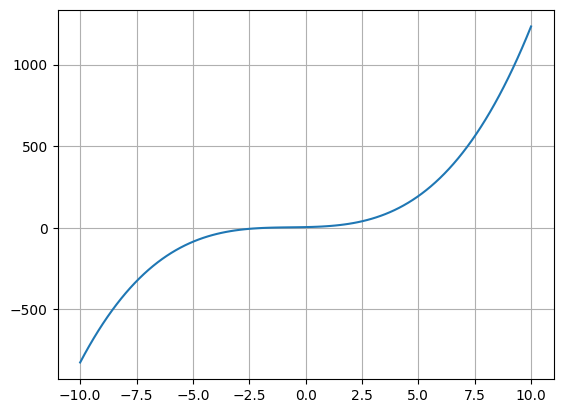

In [21]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y_values = poly(x)
plt.plot(x,y_values,label='3rd degree poly')
plt.grid(True)
plt.show

5.2 autodifferentiation

In [55]:
# one at a time
xs = torch.linspace(-2, 2, 100)
yps = []
for x in xs:
   x.requires_grad_(True)
   y =    poly(x)
   y.backward()
   yp =   x.grad
   yps.append(yp.detach())

print(yps)

[tensor(7.), tensor(6.6817), tensor(6.3731), tensor(6.0744), tensor(5.7854), tensor(5.5063), tensor(5.2369), tensor(4.9773), tensor(4.7276), tensor(4.4876), tensor(4.2574), tensor(4.0370), tensor(3.8264), tensor(3.6257), tensor(3.4346), tensor(3.2534), tensor(3.0820), tensor(2.9204), tensor(2.7686), tensor(2.6266), tensor(2.4943), tensor(2.3719), tensor(2.2593), tensor(2.1564), tensor(2.0634), tensor(1.9801), tensor(1.9066), tensor(1.8430), tensor(1.7891), tensor(1.7450), tensor(1.7107), tensor(1.6863), tensor(1.6716), tensor(1.6667), tensor(1.6716), tensor(1.6863), tensor(1.7107), tensor(1.7450), tensor(1.7891), tensor(1.8430), tensor(1.9066), tensor(1.9801), tensor(2.0634), tensor(2.1564), tensor(2.2593), tensor(2.3719), tensor(2.4943), tensor(2.6266), tensor(2.7686), tensor(2.9204), tensor(3.0820), tensor(3.2534), tensor(3.4346), tensor(3.6257), tensor(3.8264), tensor(4.0370), tensor(4.2574), tensor(4.4876), tensor(4.7276), tensor(4.9773), tensor(5.2369), tensor(5.5063), tensor(5.78

In [54]:
# all at once
xs = torch.linspace(-2, 2, 100, requires_grad=True)
ys = poly(xs)
yps = torch.autograd.grad(ys, xs, torch.ones_like(xs))[0]

xs = xs.detach().numpy()
yps = yps.detach().numpy()

# print(xs)
# print(ys)
print("derivative of poly(x)")
print(yps)

derivative of poly(x)
[ 7.         6.6816645  6.3731256  6.0743794  5.7854295  5.506275
  5.2369146  4.9773483  4.7275786  4.4876037  4.257423   4.037037
  3.8264465  3.6256504  3.4346495  3.2534432  3.0820327  2.9204164
  2.7685947  2.6265693  2.494337   2.3719008  2.2592592  2.1564126
  2.0633607  1.9801042  1.9066422  1.8429754  1.7891033  1.7450261
  1.7107439  1.6862564  1.6715641  1.6666667  1.6715641  1.6862565
  1.7107438  1.7450261  1.7891032  1.8429751  1.9066422  1.9801041
  2.063361   2.1564126  2.2592592  2.3719008  2.4943373  2.6265688
  2.768595   2.920416   3.0820324  3.2534435  3.4346495  3.6256506
  3.8264463  4.037037   4.257423   4.487603   4.7275786  4.9773493
  5.236915   5.5062747  5.7854295  6.07438    6.373125   6.6816654
  7.0000005  7.32813    7.666054   8.013774   8.371288   8.738598
  9.115704   9.502602   9.899296  10.305784  10.722069  11.148149
 11.584022  12.029691  12.485155  12.950413  13.425467  13.910316
 14.404959  14.909397  15.42363   15.947659  

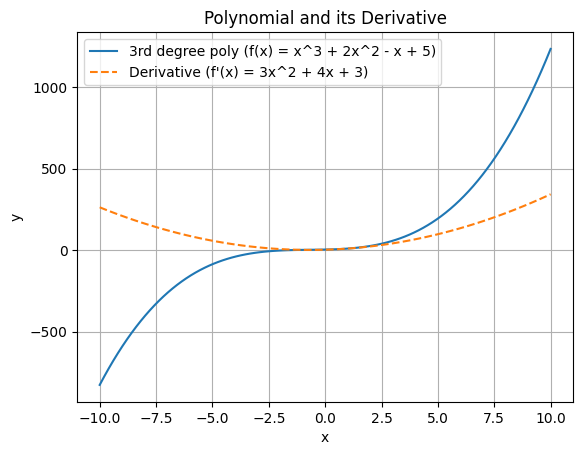

In [56]:
def poly_deriv(x):
    y = 3*x**2 + 4*x + 3
    return y

x = np.linspace(-10,10,100)
y_values = poly(x)
y_deriv_values = poly_deriv(x)

plt.plot(x, y_values, label='3rd degree poly (f(x) = x^3 + 2x^2 - x + 5)')
plt.plot(x, y_deriv_values, label='Derivative (f\'(x) = 3x^2 + 4x + 3)', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial and its Derivative')

plt.grid(True)
plt.legend()

plt.show()

In [48]:
# from he tutorial on comp24.sci27.dk
ps = torch.tensor([1.0, 2, 3], requires_grad=True)
qs = ps**2
print(ps)
print(qs)
dq_dp = torch.autograd.grad(qs, ps, torch.ones_like(ps))[0]
print(dq_dp)

tensor([1., 2., 3.], requires_grad=True)
tensor([1., 4., 9.], grad_fn=<PowBackward0>)
tensor([2., 4., 6.])


5.3 higher derivatives

Second derivative of poly(x):
[-8.         -7.757576   -7.515152   -7.272727   -7.030303   -6.787879
 -6.545454   -6.30303    -6.060606   -5.818182   -5.575757   -5.333334
 -5.090909   -4.848484   -4.606061   -4.363636   -4.121212   -3.878788
 -3.6363635  -3.39394    -3.151515   -2.909091   -2.666667   -2.4242425
 -2.181818   -1.939394   -1.69697    -1.4545455  -1.212121   -0.969697
 -0.727273   -0.4848485  -0.24242401  0.          0.24242449  0.4848485
  0.7272725   0.969697    1.2121212   1.4545455   1.6969697   1.939394
  2.181818    2.4242425   2.6666665   2.909091    3.1515152   3.3939395
  3.6363635   3.8787878   4.121212    4.3636365   4.6060605   4.848485
  5.090909    5.3333335   5.5757575   5.818182    6.060606    6.30303
  6.5454545   6.787879    7.030303    7.2727275   7.5151515   7.7575755
  8.          8.242424    8.484848    8.727273    8.969697    9.212121
  9.454546    9.69697     9.939394   10.181818   10.424242   10.666667
 10.909091   11.151515   11.39394    11.6363

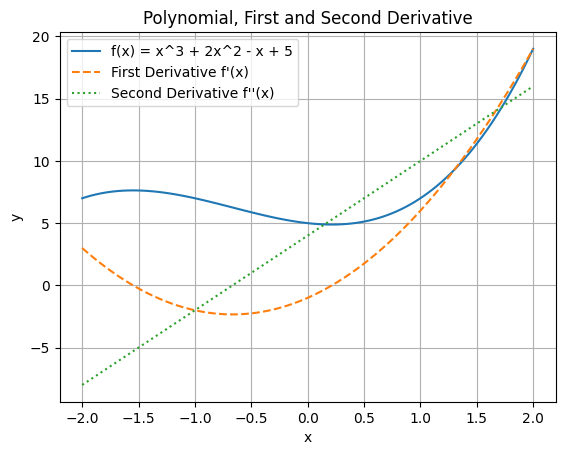

In [61]:
import torch
import numpy as np

# Define the polynomial function: f(x) = x^3 + 2x^2 - x + 5
def poly(x):
    return x**3 + 2*x**2 - x + 5

# Create tensor with requires_grad=True
xs = torch.linspace(-2, 2, 100, requires_grad=True)

# Calculate the polynomial ys = poly(xs)
ys = poly(xs)

# First derivative of ys with respect to xs
yps = torch.autograd.grad(ys, xs, torch.ones_like(xs), create_graph=True)[0]

# Second derivative of ys with respect to xs
ypps = torch.autograd.grad(yps, xs, torch.ones_like(xs), create_graph=True)[0]

# Third derivative of ys wrt xs
yppps = torch.autograd.grad(ypps, xs, torch.ones_like(xs), create_graph=True)[0]

# Detach and convert to numpy for plotting
xs_np = xs.detach().numpy()
ys_np = ys.detach().numpy()
yps_np = yps.detach().numpy()
ypps_np = ypps.detach().numpy()

# Print the second derivative
print("Second derivative of poly(x):")
print(ypps_np)

# Example plot using matplotlib
import matplotlib.pyplot as plt

plt.plot(xs_np, ys_np, label='f(x) = x^3 + 2x^2 - x + 5')
plt.plot(xs_np, yps_np, label='First Derivative f\'(x)', linestyle='--')
plt.plot(xs_np, ypps_np, label='Second Derivative f\'\'(x)', linestyle=':')
plt.grid(True)
plt.legend()
plt.title('Polynomial, First and Second Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


6.2 Derivative of Gaussian

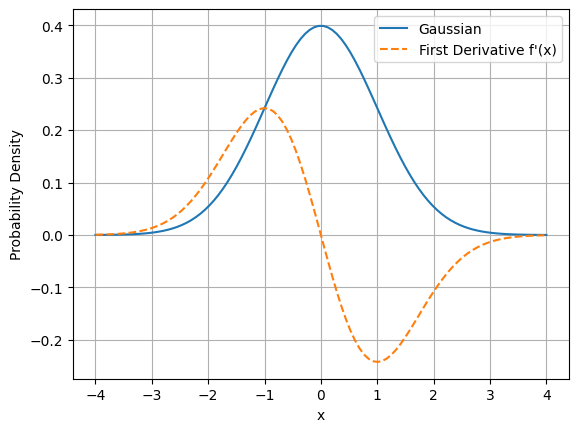

In [32]:
import torch
import matplotlib.pyplot as plt

# Parameters for the Gaussian
mu = 0
sigma = 1

# Define Gaussian function using torch
def Gaussian(x):
    y = (1 / (sigma * torch.sqrt(torch.tensor(2 * torch.pi)))) * torch.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return y

# Generate x values as a torch tensor
xs = torch.linspace(mu - 4 * sigma, mu + 4 * sigma, 100, requires_grad=True)
ys = Gaussian(xs)

# Calculate the derivative
yps = torch.autograd.grad(ys, xs, torch.ones_like(xs), create_graph=True)[0]

# Convert tensors to numpy for plotting
xs_np = xs.detach().numpy()
ys_np = ys.detach().numpy()
yps_np = yps.detach().numpy()

# Plotting
plt.plot(xs_np, ys_np, label='Gaussian')
plt.plot(xs_np, yps_np, label='First Derivative f\'(x)', linestyle='--')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()


6.3 Fermi function derivative

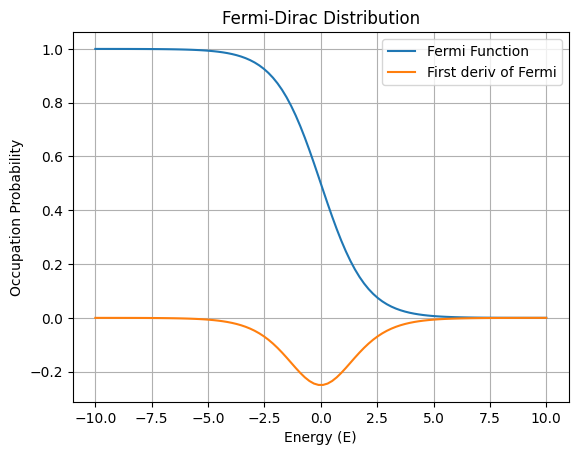

In [34]:
import torch
import matplotlib.pyplot as plt

# Constants
Ef = 0  # Fermi energy
kT = 1  # Thermal energy, k * T

# Define the Fermi function using torch
def fermi_function(E):
    return 1 / (torch.exp((E - Ef) / kT) + 1)

# Generate E values as a torch tensor
E_values = torch.linspace(Ef - 10 * kT, Ef + 10 * kT, 100, requires_grad=True)
f_values = fermi_function(E_values)

# Calculate the derivative
f_prime_values = torch.autograd.grad(f_values, E_values, torch.ones_like(E_values), create_graph=True)[0]

# Convert tensors to numpy for plotting
E_np = E_values.detach().numpy()
f_np = f_values.detach().numpy()
fp_np = f_prime_values.detach().numpy()

# Plotting
plt.plot(E_np, f_np, label='Fermi Function')
plt.plot(E_np, fp_np, label='First deriv of Fermi')
plt.xlabel('Energy (E)')
plt.ylabel('Occupation Probability')
plt.title('Fermi-Dirac Distribution')
plt.legend()
plt.grid()
plt.show()


6.4 LJ potential derivative

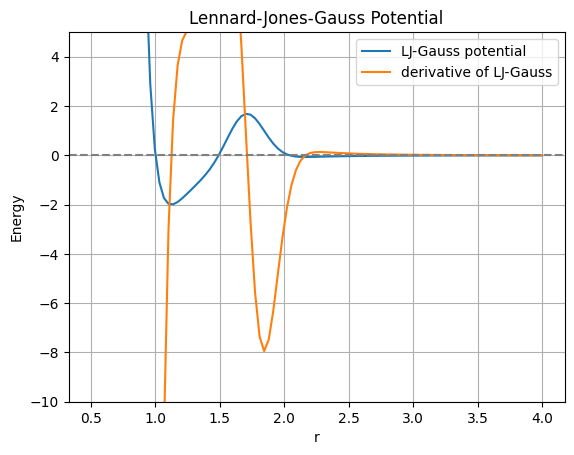

In [52]:
import torch
import matplotlib.pyplot as plt

class LennardJonesGauss:
    def __init__(self, eps=1, sigma=1, r0=1.7, A=1, b=0.1):
        self.eps = eps
        self.sigma = sigma
        self.r0 = r0
        self.A = A  # Height of the Gaussian term
        self.b = b  # Width of the Gaussian term
        
    def V(self, r):
        # Avoid division by zero
        r = torch.maximum(r, torch.tensor(1e-6))  # Small positive value to prevent division by zero
        # Lennard-Jones potential formula
        lj_potential = 4 * self.eps * ((self.sigma / r)**12 - (self.sigma / r)**6)
        # Gaussian term
        gaussian_term = self.A * torch.exp(-((r - self.r0) / self.b)**2)
        return lj_potential + gaussian_term

# Create an instance of the LennardJonesGauss class
calc = LennardJonesGauss(eps=2, sigma=1, A=2, r0=1.7, b=0.2)  # Adjust parameters as needed

# Generate r values for plotting
xs = torch.linspace(0.5, 4, 100, requires_grad=True)  # Start from 0.5 to avoid very small values
ys = calc.V(xs)
yps = torch.autograd.grad(ys, xs, torch.ones_like(xs), create_graph=True)[0]

# Plotting
plt.plot(xs.detach().numpy(), ys.detach().numpy(), label='LJ-Gauss potential')
plt.plot(xs.detach().numpy(), yps.detach().numpy(), label='derivative of LJ-Gauss')
plt.xlabel('r')
plt.ylabel('Energy')
plt.title('Lennard-Jones-Gauss Potential')
plt.legend()
plt.grid() 
plt.ylim(-10, 5)  # Set y limits to better visualize the potential
plt.axhline(0, color='gray', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()


ex 43 7.1 the real gradient

In [71]:
# Define the original function
def f(x1, x2):
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import torch

class ContourPlotter:
    def __init__(self, func, r_min=-5.0, r_max=5.0, step=0.1):
        self.func = func
        self.r_min = r_min
        self.r_max = r_max
        self.step = step
        self.fig, self.ax = plt.subplots()

    def plot_contour(self):
        vals = np.arange(self.r_min, self.r_max, self.step)
        x1d, x2d = np.meshgrid(vals, vals)
        yd = self.func(x1d, x2d)

        levels = np.geomspace(1, 300, 8)
        self.ax.contour(x1d, x2d, yd, levels=levels)
        color_map = self.ax.contourf(x1d, x2d, yd, levels=levels, alpha=0.5)
        self.fig.colorbar(color_map, ax=self.ax)
        self.ax.set(xlabel='$x_1$', ylabel='$x_2$')
        
    def plot_gradients(self, points):
        for P0 in points:
            P0_tensor = torch.tensor(P0, requires_grad=True)
            y = self.func(*P0_tensor)
            y.backward()
            grad_of_y = P0_tensor.grad.detach()
            P0_tensor = P0_tensor.detach()

            # Normalize the gradient for visualization
            v = grad_of_y / np.linalg.norm(grad_of_y)

            # Scatter the point and draw the gradient arrow
            self.ax.scatter(*P0_tensor, s=200, c='k')  # Scatter the point
            self.ax.arrow(*P0_tensor, *v, width=0.2, head_width=0.3, color='red')  # Draw the arrow for the gradient

    def show(self):
        plt.show()  # Display the plot with gradients


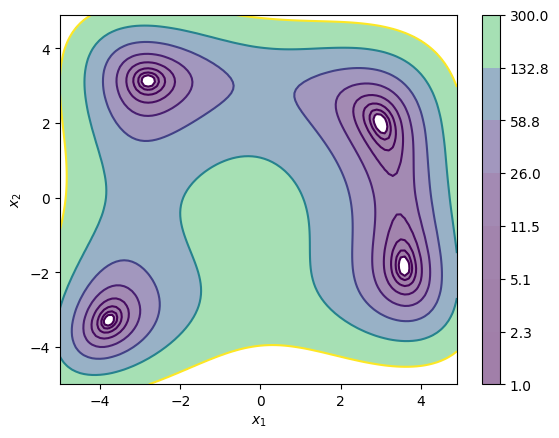

In [73]:
plotter = ContourPlotter(func=f)
plotter.plot_contour()
plotter.show()

7.3 The gradients

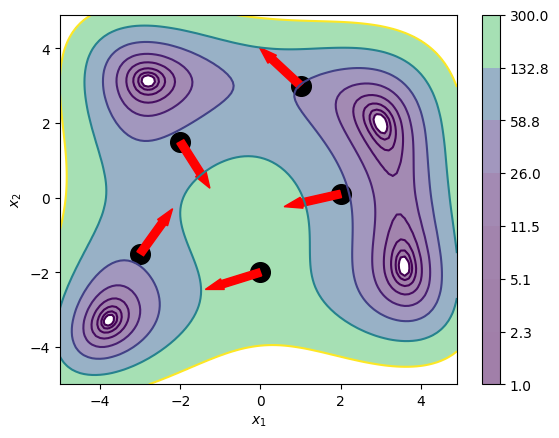

In [78]:
# Create an instance of ContourPlotter
plotter = ContourPlotter(func=f)

# Plot the contour
plotter.plot_contour()

# Specify points for gradient visualization
gradient_points = [[-2, 1.5], [2, 0.1], [-3, -1.5], [0.0,-2.0], [1.0, 3.0]]

# Plot gradients at the specified points
plotter.plot_gradients(points=gradient_points)

# Show the plot
plotter.show()


ex44: 8.1 Using a pytorch model: 8.2 A parabola

In [79]:
a = 1.5
b = 0.5
c = 2
def parab(x):
    return a*x**2+b*x+c

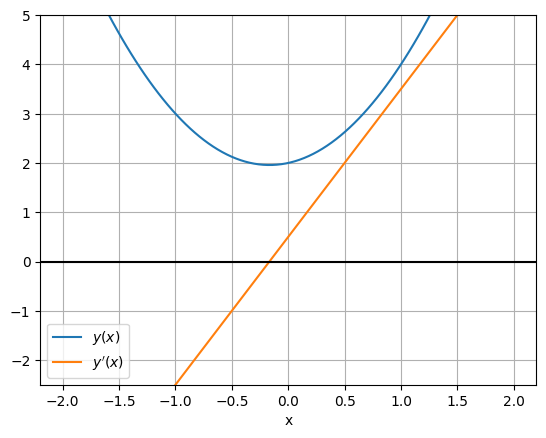

In [82]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-2, 2, 100, requires_grad=True)
ys = parab(xs)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy
    ax.plot(xs, yps, label="$y'(x)$")  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

plt.show()  # Display the plot

8.3 Fitting

In [124]:
class ParabolaModel(torch.nn.Module):
    def __init__(self, a=1, b=0, c=0):
        super().__init__()
        self.a = torch.nn.Parameter(torch.tensor(float(a)))
        self.b = torch.nn.Parameter(torch.tensor(float(b)))
        self.c = torch.nn.Parameter(torch.tensor(float(c)))

    def forward(self, x):
        return self.a * x**2 + self.b * x + self.c
    
    # def __call__(sekf, *args, **kwargs):
    #     return self.forward(*args, *kwargs)

a = 1
b = 2
c = 3

model = ParabolaModel(a=a,b=b,c=c)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(2., requires_grad=True)
Parameter containing:
tensor(3., requires_grad=True)
a = 1.0
b = 2.0
c = 3.0


Use pytorch model to determine a,b,c so as to make the curve (x,y(x)) fit the data [[1,2],[3,4],[5,1]] in the best way possible.

In [122]:
xtest_tensor = torch.tensor([1,3.,5])
ytest_tensor = torch.tensor([2,4.,1])

In [125]:
steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

loss_fn = torch.nn.MSELoss() #added at next slide

for step in range(steps):
    y_pred = model(xtest_tensor)
    loss = torch.mean((y_pred - ytest_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Step 0, Loss: 527.0
Step 500, Loss: 0.7490184903144836
Step 1000, Loss: 0.5840409398078918
Step 1500, Loss: 0.524422287940979
Step 2000, Loss: 0.4825302064418793
Step 2500, Loss: 0.44568920135498047
Step 3000, Loss: 0.4119041860103607
Step 3500, Loss: 0.38071581721305847
Step 4000, Loss: 0.35189369320869446
Step 4500, Loss: 0.32525405287742615
Step 5000, Loss: 0.30063143372535706
Step 5500, Loss: 0.2778727114200592
Step 6000, Loss: 0.25683701038360596
Step 6500, Loss: 0.23739349842071533
Step 7000, Loss: 0.2194223403930664
Step 7500, Loss: 0.2028115838766098
Step 8000, Loss: 0.18745805323123932
Step 8500, Loss: 0.1732671856880188
Step 9000, Loss: 0.16015052795410156
Step 9500, Loss: 0.14802706241607666
a = -0.4443545937538147
b = 2.3349759578704834
c = 0.569392204284668


add a graph like in the exercise description

8.4 Gaussian

In [126]:
def Gaussian(x):
    A = 1
    sigma = 1
    x0 = 0
    return A * torch.exp(-(x-x0)**2/(2*sigma**2))

In [127]:
# Gaussian model

class GaussianModel(torch.nn.Module):
    def __init__(self, A=1, x0=0, sigma=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.x0 = torch.nn.Parameter(torch.tensor(float(x0)))
        self.sigma = torch.nn.Parameter(torch.tensor(float(sigma)))

    def forward(self, x):
        return self.A * torch.exp(-(x-self.x0)**2/(2*sigma**2))
    
    # def __call__(sekf, *args, **kwargs):
    #     return self.forward(*args, *kwargs)

A = 1
x0 = 0
sigma = 1

model = GaussianModel(A=A,x0=x0,sigma=sigma)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
A = 1.0
x0 = 0.0
sigma = 1.0


In [128]:
# still the same points as in parabola exercise above
xtest_tensor = torch.tensor([1,3.,5])
ytest_tensor = torch.tensor([2,4.,1])

In [129]:
steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(xtest_tensor)
    loss = torch.mean((y_pred - ytest_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Step 0, Loss: 6.284332752227783
Step 500, Loss: 5.86681604385376
Step 1000, Loss: 5.443511486053467
Step 1500, Loss: 4.613120079040527
Step 2000, Loss: 2.2016050815582275
Step 2500, Loss: 1.1856884956359863
Step 3000, Loss: 0.8015625476837158
Step 3500, Loss: 0.5857678055763245
Step 4000, Loss: 0.4532029330730438
Step 4500, Loss: 0.3713184893131256
Step 5000, Loss: 0.32083335518836975
Step 5500, Loss: 0.28973937034606934
Step 6000, Loss: 0.2706001102924347
Step 6500, Loss: 0.25882551074028015
Step 7000, Loss: 0.25158390402793884
Step 7500, Loss: 0.24713124334812164
Step 8000, Loss: 0.2443939447402954
Step 8500, Loss: 0.24271135032176971
Step 9000, Loss: 0.24167710542678833
Step 9500, Loss: 0.24104152619838715
A = 4.9006171226501465
x0 = 2.3766415119171143
sigma = 1.0


8.5 Circle

In [143]:
class CircleModel(torch.nn.Module):
    def __init__(self, x1=3, y1=2, r=2):  # Start closer to the target values
        super().__init__()
        self.x1 = torch.nn.Parameter(torch.tensor(float(x1)))
        self.y1 = torch.nn.Parameter(torch.tensor(float(y1)))
        self.r = torch.nn.Parameter(torch.tensor(float(r)))

    def forward(self, x, y):
        # Compute the Euclidean distance from each point (x, y) to the center (x1, y1)
        distance = torch.sqrt((x - self.x1)**2 + (y - self.y1)**2)
        return distance

x1=0
y1=0
r=1

# Initialize the model with parameters
model = CircleModel(x1=x1, y1=y1, r=r)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [144]:
steps = 10000
for step in range(steps):
    distances = model(xtest_tensor, ytest_tensor)
    # Loss as the mean squared deviation of distances from the radius
    loss = torch.mean((distances - model.r) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

# Final parameters
for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Step 0, Loss: 11.443275451660156
Step 500, Loss: 0.9162206053733826
Step 1000, Loss: 0.17983998358249664
Step 1500, Loss: 0.024594850838184357
Step 2000, Loss: 0.0003348416357766837
Step 2500, Loss: 6.297383947639901e-07
Step 3000, Loss: 1.7071973001936414e-10
Step 3500, Loss: 7.491962605854496e-11
Step 4000, Loss: 4.375048587301755e-11
Step 4500, Loss: 2.5787963778278744e-11
Step 5000, Loss: 1.5631940186722204e-11
Step 5500, Loss: 9.644433689171006e-12
Step 6000, Loss: 5.722237354094384e-12
Step 6500, Loss: 2.8232232090336096e-12
Step 7000, Loss: 1.572667885675616e-12
Step 7500, Loss: 9.663381206337363e-13
Step 8000, Loss: 4.926429815303723e-13
Step 8500, Loss: 3.031649096259942e-13
Step 9000, Loss: 7.579122740649855e-14
Step 9500, Loss: 7.579122740649855e-14
x1 = 3.0999996662139893
y1 = 1.8999998569488525
r = 2.10237979888916


ex45: 9.1 Gaussian fit

In [149]:
# Gaussian model

class GaussianModel(torch.nn.Module):
    def __init__(self, A=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))

    def forward(self, x):
        x0 = -1
        sigma = 0.3
        return self.A * np.exp(-(x-x0)**2/(2*sigma**2))

A = 1

model = GaussianModel(A=A)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(1., requires_grad=True)
A = 1.0


In [150]:
data = np.array([[-1.493,  0.048],
       [-1.25 ,  0.459],
       [-0.842,  0.731],
       [-0.676,  0.269],
       [-0.332,  0.004],
       [ 0.544,  0.   ],
       [ 1.363,  0.079],
       [ 1.621,  0.083],
       [ 1.853,  0.021],
       [ 2.892,  0.   ]])

#rewrite to have same form as in ex 44
xtest_tensor = torch.tensor([row[0] for row in data])
ytest_tensor = torch.tensor([row[1] for row in data])

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

loss_fn = torch.nn.MSELoss() #added at next slide

for step in range(steps):
    y_pred = model(xtest_tensor)
    loss = torch.mean((y_pred - ytest_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

/tmp/ipykernel_4721/2750171358.py:11: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return self.A * np.exp(-(x-x0)**2/(2*sigma**2))


Step 0, Loss: 0.022890961818365235
Step 500, Loss: 0.01829491153830548
Step 1000, Loss: 0.014986174202384623
Step 1500, Loss: 0.012604149404256465
Step 2000, Loss: 0.010889286845300024
Step 2500, Loss: 0.009654718205596706
Step 3000, Loss: 0.00876592303630013
Step 3500, Loss: 0.008126045446074606
Step 4000, Loss: 0.007665396710778344
Step 4500, Loss: 0.007333764226931927
Step 5000, Loss: 0.007095016424335379
Step 5500, Loss: 0.006923136638246685
Step 6000, Loss: 0.006799395631756395
Step 6500, Loss: 0.006710315280628809
Step 7000, Loss: 0.006646179523427579
Step 7500, Loss: 0.006600009511468818
Step 8000, Loss: 0.006566769801161487
Step 8500, Loss: 0.006542840445298831
Step 9000, Loss: 0.0065256122956515675
Step 9500, Loss: 0.0065132118923716285
A = 0.6957690715789795


In [ ]:
data = np.array([[-1.493,  0.048],
       [-1.25 ,  0.459],
       [-0.842,  0.731],
       [-0.676,  0.269],
       [-0.332,  0.004],
       [ 0.544,  0.   ],
       [ 1.363,  0.079],
       [ 1.621,  0.083],
       [ 1.853,  0.021],
       [ 2.892,  0.   ]])

#rewrite to have same form as in ex 44
xtest_tensor = torch.tensor([row[0] for row in data])
ytest_tensor = torch.tensor([row[1] for row in data])

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

loss_fn = torch.nn.MSELoss() #added at next slide

for step in range(steps):
    y_pred = model(xtest_tensor)
    loss = torch.mean((y_pred - ytest_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

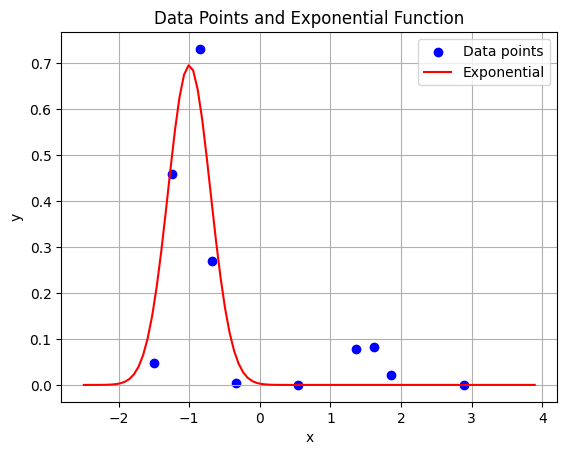

In [153]:
# Define the exponential function
def exponential_func(x):
    A = 0.6957690715789795
    x0 = -1 
    sigma = 0.3
    return A * torch.exp(-(x-x0)**2/(2*sigma**2))

# Plot data points
plt.scatter(xtest_tensor, ytest_tensor, color='blue', label='Data points')

# Plot the exponential function
x_vals = torch.linspace(min(xtest_tensor).item() - 1, max(xtest_tensor).item() + 1, 100)
A, b = 1, 0.5  # Customize A and b as desired
y_vals = exponential_func(x_vals)
plt.plot(x_vals, y_vals, color='red', label=f'Exponential')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data Points and Exponential Function')
plt.grid(True)
plt.show()

9.2 Full fit

In [184]:
# Gaussian model

class GaussianModel(torch.nn.Module):
    def __init__(self, A=1, x0=0, sigma=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.x0 = torch.nn.Parameter(torch.tensor(float(x0)))
        self.sigma = torch.nn.Parameter(torch.tensor(float(sigma)))

    def forward(self, x):
        return self.A * torch.exp(-(x-self.x0)**2/(2*sigma**2))

A = 0.1
x0 = 1.2
sigma = 0.5

model = GaussianModel(A=A,x0=x0,sigma=sigma)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(0.1000, requires_grad=True)
Parameter containing:
tensor(1.2000, requires_grad=True)
Parameter containing:
tensor(0.5000, requires_grad=True)
A = 0.10000000149011612
x0 = 1.2000000476837158
sigma = 0.5


In [185]:
data = np.array([[-1.493,  0.048],
       [-1.25 ,  0.459],
       [-0.842,  0.731],
       [-0.676,  0.269],
       [-0.332,  0.004],
       [ 0.544,  0.   ],
       [ 1.363,  0.079],
       [ 1.621,  0.083],
       [ 1.853,  0.021],
       [ 2.892,  0.   ]])

#rewrite to have same form as in ex 44
xtest_tensor = torch.tensor([row[0] for row in data])
ytest_tensor = torch.tensor([row[1] for row in data])

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(xtest_tensor)
    loss = torch.mean((y_pred - ytest_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Step 0, Loss: 0.08223051359188323
Step 500, Loss: 0.08221236818409165
Step 1000, Loss: 0.08219948332959652
Step 1500, Loss: 0.08219032171653791
Step 2000, Loss: 0.0821837491725416
Step 2500, Loss: 0.08217902171544605
Step 3000, Loss: 0.08217559925515358
Step 3500, Loss: 0.0821730976572152
Step 4000, Loss: 0.08217124593148012
Step 4500, Loss: 0.08216985299902232
Step 5000, Loss: 0.08216878400651481
Step 5500, Loss: 0.08216794380895984
Step 6000, Loss: 0.0821672321602186
Step 6500, Loss: 0.08216662113016308
Step 7000, Loss: 0.08216609079960599
Step 7500, Loss: 0.08216561783687602
Step 8000, Loss: 0.0821651857628177
Step 8500, Loss: 0.08216478296110956
Step 9000, Loss: 0.08216440118566185
Step 9500, Loss: 0.0821640346391771
A = 0.0817173421382904
x0 = 1.2074532508850098
sigma = 0.5


0.0817173421382904 1.2074532508850098 0.5


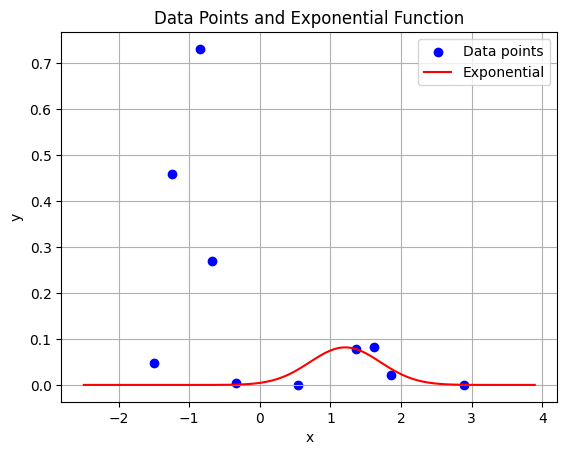

In [186]:
# Define the exponential function with parameters as arguments
def exponential_func(x, A, x0, sigma):
    return A * torch.exp(-(x - x0)**2 / (2 * sigma**2))

# Assign values to A, x0, sigma from the model
for name, parameter in model.named_parameters():
    globals()[name] = parameter.data.item()

print(A, x0, sigma)  # Check that parameters are assigned correctly

# Plot data points
plt.scatter(xtest_tensor, ytest_tensor, color='blue', label='Data points')

# Plot the exponential function
x_vals = torch.linspace(min(xtest_tensor).item() - 1, max(xtest_tensor).item() + 1, 100)
y_vals = exponential_func(x_vals, A, x0, sigma)
plt.plot(x_vals, y_vals, color='red', label=f'Exponential')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data Points and Exponential Function')
plt.grid(True)
plt.show()


ex46: 10.1 Spring models

In [193]:
# make a torch.nn.module-model for the optimizable coords
# energy func as forword func for model
# choose optimizer that is aware of optimizable coords
# optimize the loss func (i.e. the energy func) 
# energy func obtained by calling the model w/o params

class TwoSpringSys(torch.nn.Module):
    def __init__(self,P0,P2,equilibrium_len=2.0,spring_const=1.0):
        super().__init__()
        self.P0 = torch.tensor(P0)
        self.P1 = torch.nn.Parameter(torch.rand(1,2)*5)
        self.P2 = torch.tensor(P2)
        self.equilibrium_len = equilibrium_len
        self.spring_const = spring_const
    
    def forward(self):
        d1 = torch.norm(self.P1 - self.P0)
        d2 = torch.norm(self.P2 - self.P1)

        energy = 0.5*self.spring_const*(d1-self.equilibrium_len)**2 \
                + 0.5*self.spring_const *(d2-self.equilibrium_len)**2
        
        return energy
    
    def draw(self,ax):
        pos = torch.vstack((self.P0,self.P1.detach(),self.P2))
        ax.scatter(pos[:,0],pos[:,1],color='C0',s=400)
        for i in range(3):
            ax.text(pos[i,0]*1,
                    pos[i,1]*1,
                    f'{i}',color='w',ha='center',va='center')
            
        for i in range(2):
            j = i + 1
            ax.plot([pos[i,0],pos[j,0]],
                    [pos[i,1],pos[j,1]],
                color='C0')
            
        ax.set_aspect('equal','box')
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.grid('on')
        ax.set(xlim=[-0.5,7],ylim=[-3,5],xlabel='x',ylabel='y')

learning_rate = 0.01
steos = 10000
P0 = [0,0]
P2 = [4,0]

model = TwoSpringSys(P0,P2)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for step in range(steps):
    optimizer.zero_grad()
    energy = model()
    energy.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Energy: {energy.item()}')

print("Optimized position of P1:", model.P1.data.numpy())

Step 0, Energy: 4.561047554016113
Step 500, Energy: 0.01414542831480503
Step 1000, Energy: 0.00313826953060925
Step 1500, Energy: 0.0013193308841437101
Step 2000, Energy: 0.0007184784044511616
Step 2500, Energy: 0.00045010496978648007
Step 3000, Energy: 0.000307843234622851
Step 3500, Energy: 0.0002235820284113288
Step 4000, Energy: 0.0001696487161098048
Step 4500, Energy: 0.00013307659537531435
Step 5000, Energy: 0.00010714942618506029
Step 5500, Energy: 8.810937288217247e-05
Step 6000, Energy: 7.371819810941815e-05
Step 6500, Energy: 6.257963104872033e-05
Step 7000, Energy: 5.378572677727789e-05
Step 7500, Energy: 4.67202698928304e-05
Step 8000, Energy: 4.095834447070956e-05
Step 8500, Energy: 3.6199628084432334e-05
Step 9000, Energy: 3.2222749723587185e-05
Step 9500, Energy: 2.8866586944786832e-05
Optimized position of P1: [[1.999997   0.14291734]]


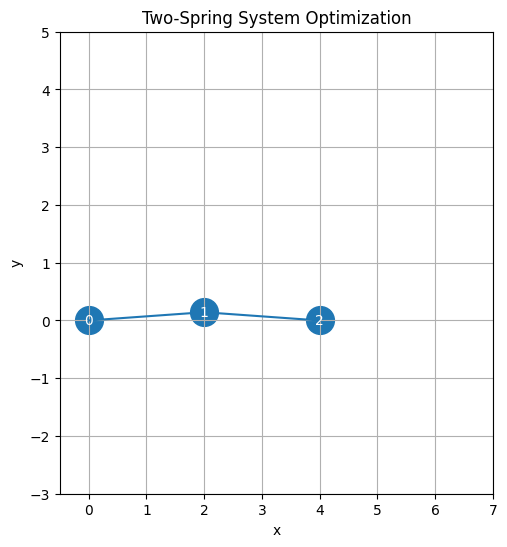

In [194]:
fig, ax = plt.subplots(figsize=(8, 6))
model.draw(ax)
plt.title('Two-Spring System Optimization')
plt.show()

10.3 A string of beads

Step 0, Energy: 8.328390121459961
Step 500, Energy: 0.022398877888917923
Step 1000, Energy: 0.0017766994424164295
Step 1500, Energy: 0.00014999680570326746
Step 2000, Energy: 1.2783064448740333e-05
Step 2500, Energy: 1.092787442757981e-06
Step 3000, Energy: 9.446971205306909e-08
Step 3500, Energy: 8.658062711219827e-09
Optimized positions of beads:
Bead 1: [1.5894723 1.2139603]
Bead 2: [2.8286111 2.7838764]
Bead 3: [2.2056727  0.88337666]


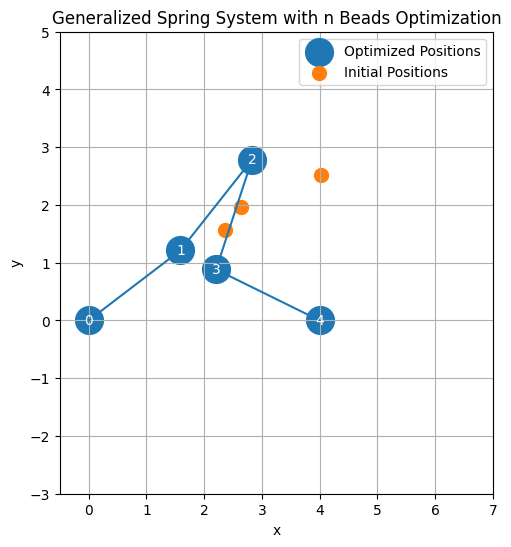

In [199]:
import torch
import matplotlib.pyplot as plt

# Define the generalized spring system model
class SpringSystem(torch.nn.Module):
    def __init__(self, P0, P2, n, equilibrium_len=2.0, spring_const=1.0):
        super().__init__()
        self.P0 = torch.tensor(P0, dtype=torch.float32)
        self.P2 = torch.tensor(P2, dtype=torch.float32)
        
        # Create n-2 optimizable beads initialized randomly
        self.P = torch.nn.Parameter(torch.rand(n - 2, 2) * 5)  # Random initial positions
        
        self.equilibrium_len = equilibrium_len
        self.spring_const = spring_const
    
    def forward(self):
        energy = 0.0
        
        # Calculate energy between fixed points and beads
        d1 = torch.norm(self.P[0] - self.P0)  # First bead to P0
        energy += 0.5 * self.spring_const * (d1 - self.equilibrium_len) ** 2
        
        for i in range(1, len(self.P)):
            d2 = torch.norm(self.P[i] - self.P[i-1])  # Spring between adjacent beads
            energy += 0.5 * self.spring_const * (d2 - self.equilibrium_len) ** 2
            
        # Energy between the last bead and the fixed point P2
        d3 = torch.norm(self.P[-1] - self.P2)
        energy += 0.5 * self.spring_const * (d3 - self.equilibrium_len) ** 2
        
        return energy
    
    def draw(self, ax, show_initial=False):
    # Prepare positions: include fixed points and optimized beads
        pos = torch.vstack((self.P0, self.P.detach(), self.P2))  # Use .detach() for P

        # Plot the optimized positions
        ax.scatter(pos[:, 0].numpy(), pos[:, 1].numpy(), color='C0', s=400, label='Optimized Positions')  # Convert to NumPy
        for i in range(len(pos)):
            ax.text(pos[i, 0].item(), pos[i, 1].item(), f'{i}', color='w', ha='center', va='center')

        # Draw springs between beads and fixed points
        ax.plot([self.P0[0].item(), self.P[0, 0].item()], [self.P0[1].item(), self.P[0, 1].item()], color='C0')
        for i in range(1, len(self.P)):
            ax.plot([self.P[i-1, 0].item(), self.P[i, 0].item()], [self.P[i-1, 1].item(), self.P[i, 1].item()], color='C0')
        ax.plot([self.P[-1, 0].item(), self.P2[0].item()], [self.P[-1, 1].item(), self.P2[1].item()], color='C0')

        # If show_initial is True, plot initial bead positions
        if show_initial:
            initial_positions = torch.rand(len(self.P), 2) * 5  # Initial random positions
            ax.scatter(initial_positions.numpy()[:, 0], initial_positions.numpy()[:, 1], color='C1', s=100, label='Initial Positions')
        
        ax.set_aspect('equal', 'box')
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.grid('on')
        ax.set(xlim=[-0.5, 7], ylim=[-3, 5], xlabel='x', ylabel='y')
        ax.legend()



# Parameters
learning_rate = 0.01
steps = 4000
P0 = [0, 0]  # Fixed point 1
P2 = [4, 0]  # Fixed point 2
n = 5        # Total number of beads (including fixed ones)

# Create the model and optimizer
model = SpringSystem(P0, P2, n)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Optimize the model
for step in range(steps):
    optimizer.zero_grad()
    energy = model()
    energy.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Energy: {energy.item()}')

# Print the optimized positions of beads
optimized_positions = model.P.data.numpy()
print("Optimized positions of beads:")
for i, pos in enumerate(optimized_positions):
    print(f'Bead {i + 1}: {pos}')

# Plot the system after optimization
fig, ax = plt.subplots(figsize=(8, 6))
model.draw(ax, show_initial=True)  # Pass show_initial=True
plt.title('Generalized Spring System with n Beads Optimization')
plt.show()
